# Import Library

In [1]:
# 导入库
import numpy as np  # numpy库
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet  # 批量导入要实现的回归算法
from sklearn.svm import SVR  # SVM中的回归算法
from sklearn.svm import LinearSVR  # SVM中的回归算法
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor  # 集成算法
from sklearn.model_selection import cross_val_score  # 交叉检验
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score  # 批量导入指标算法
import pandas as pd  # 导入pandas
import matplotlib.pyplot as plt  # 导入图形展示库
import xlwt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib  # 添加模型保存库

C:\Users\zhujingbao\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Data processing

In [2]:
#读取表头
workbook = xlwt.Workbook(encoding='utf-8')
#创建表
worksheet = workbook.add_sheet('sheet1')



In [3]:
train_data = pd.read_csv(open(r'\SVM-Mag train.csv',encoding='UTF-8'))
X_train = train_data.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12]].values
y_train = train_data.iloc[:, 13].values    #导入数据  iloc通过行号获取行数据



# SVM-Mag architecture, training and testing

In [4]:
from sklearn import metrics
from sklearn.metrics import r2_score

# 训练回归模型
n_folds = 6  # 设置交叉检验的次数
model_svr = SVR(C=6.732,gamma=0.153,epsilon=0.016296)  # 建立支持向量机回归模型对象 ,gamma=0.153,epsilon=0.022
model_names = [ 'SVR']  # 不同模型的名称列表
model_dic = [ model_svr]  # 不同回归模型对象的集合
cv_score_list = []  # 交叉检验结果列表
pre_y_list = []  # 各个回归模型预测的y值列表
for model in model_dic:  # 读出每个回归模型对象
    scores = cross_val_score(model, X_train, y_train, cv=n_folds)  # 将每个回归模型导入交叉检验模型中做训练检验
    cv_score_list.append(scores)  # 将交叉检验结果存入结果列表
    pre_y_list.append(model.fit(X_train, y_train).predict(X_train))  # 将回归训练中得到的预测y存入列表
print(model_svr)
joblib.dump(model_svr, 'SVM_Mag.pkl')  # 保存完整模型

# 模型效果指标评估
n_samples, n_features = X_train.shape  # 总样本量506,总特征数13
#print(n_samples, n_features)
model_metrics_name = [explained_variance_score, mean_absolute_error, mean_squared_error, r2_score]  # 回归评估指标对象集
model_metrics_list = []  # 回归评估指标列表
for i in range(1):  # 循环每个模型索引
    tmp_list = []  # 每个内循环的临时结果列表
    for m in model_metrics_name:  # 循环每个指标对象
        tmp_score = m(y_train, pre_y_list[i])  # 计算每个回归指标结果
        tmp_list.append(tmp_score)  # 将结果存入每个内循环的临时结果列表
    model_metrics_list.append(tmp_list)  # 将结果存入回归评估指标列表
df1 = pd.DataFrame(cv_score_list, index=model_names)  # 建立交叉检验的数据框
df2 = pd.DataFrame(model_metrics_list, index=model_names, columns=['ev', 'mae', 'mse', 'r2'])  # 建立回归指标的数据框
#print ('samples: %d \t features: %d' % (n_samples, n_features))  # 打印输出样本量和特征数量
print (70 * '-')  # 打印分隔线
print ('cross validation result:')  # 打印输出标题
print (df1)  # 打印输出交叉检验的数据框
print (70 * '-')  # 打印分隔线
print ('regression metrics:')  # 打印输出标题
print (df2)  # 打印输出回归指标的数据框
print (70 * '-')  # 打印分隔线
print ('short name \t full name')  # 打印输出缩写和全名标题
print ('ev \t explained_variance')
print ('mae \t mean_absolute_error')
print ('mse \t mean_squared_error')
print ('r2 \t r2')
print (70 * '-')  # 打印分隔线
      

train_prediction=pre_y_list[i]
print("训练标准差STD=",np.std(train_prediction-y_train))
print("训练误差均值MEAN=",np.mean(train_prediction-y_train))
print("训练平均绝对误差MAE=",metrics.mean_absolute_error(train_prediction, y_train))
print("训练RMSE=",metrics.mean_squared_error(train_prediction, y_train)**0.5)
print("训练MAPE=",np.mean(np.abs((y_train - train_prediction) / y_train)) * 100)
print("训练r2 score:", r2_score(y_train.ravel(), train_prediction))

SVR(C=6.732, cache_size=200, coef0=0.0, degree=3, epsilon=0.016296,
  gamma=0.153, kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
  verbose=False)
----------------------------------------------------------------------
cross validation result:
            0         1        2         3         4         5
SVR  0.822789  0.844952  0.81791  0.807897  0.844484  0.840554
----------------------------------------------------------------------
regression metrics:
           ev       mae       mse        r2
SVR  0.905238  0.216377  0.097452  0.904908
----------------------------------------------------------------------
short name 	 full name
ev 	 explained_variance
mae 	 mean_absolute_error
mse 	 mean_squared_error
r2 	 r2
----------------------------------------------------------------------
训练标准差STD= 0.31162993635110364
训练误差均值MEAN= -0.018394716686662392
训练平均绝对误差MAE= 0.21637691061131434
训练RMSE= 0.3121723607755425
训练MAPE= 5.075397211348305
训练r2 score: 0.9049082198037318


In [5]:
# 支持向量的系数（dual_coef_）
print("Dual coefficients (alpha_i * y_i):", model_svr.dual_coef_)
# 支持向量
print("Support vectors:", model_svr.support_vectors_)

# 2. 获取参数量
n_support_vectors = model_svr.support_vectors_.shape[0]
n_features = model_svr.support_vectors_.shape[1]
total_params = n_support_vectors * (n_features + 1) + 1  # 支持向量 + dual_coef + 偏置项
 
print("Number of support vectors:", n_support_vectors)
print("Number of features:", n_features)
print("Total parameters:", total_params)

Dual coefficients (alpha_i * y_i): [[-2.68656361 -6.732      -6.732      ...  6.732      -6.732
   1.60923822]]
Support vectors: [[1.59183630e-02 6.31928780e-02 1.28865615e+00 ... 1.57433098e-01
  3.08113660e-01 1.06980095e+00]
 [7.70024000e-04 3.68946400e-03 7.59707120e-02 ... 1.69080227e-01
  3.05138477e-01 1.30721834e+00]
 [2.41554400e-03 9.98891300e-03 2.13842550e-01 ... 2.89345305e-01
  2.93497205e-01 1.10163900e+00]
 ...
 [1.37364990e-02 2.70475300e-02 2.20742807e-01 ... 3.35635550e+00
  7.69876242e-01 2.31635680e+00]
 [1.76111200e-03 9.12709200e-03 1.68156820e-01 ... 3.60820212e-01
  3.41034117e-01 1.12750366e+00]
 [1.20055940e-02 2.47069310e-02 1.29721595e-01 ... 3.51996503e+00
  1.19670303e+00 2.29167481e+00]]
Number of support vectors: 44042
Number of features: 13
Total parameters: 616589


In [6]:
import pickle
import os
# 序列化模型并计算大小
with open('model.pkl', 'wb') as f:
    pickle.dump(model_svr, f)
size_mb = os.path.getsize('model.pkl') / 1024**2
print("Model size (MB):", size_mb)
os.remove('model.pkl')  # 清理临时文件

Model size (MB): 4.873309135437012


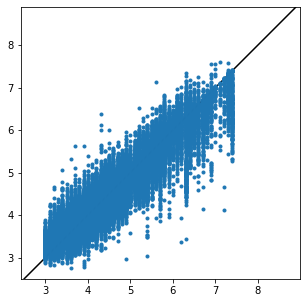

In [7]:
#训练结果
plt.figure(figsize=(5, 5))
plt.axis('equal')

x3 = np.arange(2.5, 8.9, 0.01)
y3=x3
plt.plot(x3, y3, "black")

plt.plot(y_train,train_prediction,'.')
plt.xlim(2.5, 8.9)
plt.ylim(2.5, 8.9)
plt.show()

In [22]:
test_data = pd.read_csv(open(r'\SVM-Mag test.csv',encoding='UTF-8'))
X_test = test_data.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12]].values
y_test = test_data.iloc[:, 13].values    #导入数据  iloc通过行号获取行数据

In [23]:
X_test=X_test[1,:].reshape(1, -1)
y_test=y_test[1]

import time
start_time = time.perf_counter()  # 记录开始时间
zhenli_prediction=model_svr.predict(X_test)
end_time = time.perf_counter()  # 记录结束时间
elapsed_time_ms = (end_time - start_time) * 1000  # 转换为毫秒
print(f"Elapsed time: {elapsed_time_ms:.2f} ms")

Elapsed time: 1.57 ms


In [8]:
#震例
test_data = pd.read_csv(open(r'\SVM-Mag test.csv',encoding='UTF-8'))
X_test = test_data.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12]].values
y_zhenli1 = test_data.iloc[:, 13].values    #导入数据  iloc通过行号获取行数据

In [9]:
zhenli_prediction=model_svr.predict(X_test)

In [10]:
from sklearn import metrics
from sklearn.metrics import r2_score
#print(len(y_zhenli1-zhenli_prediction))

print("测试标准差STD=",np.std(zhenli_prediction-y_zhenli1))
print("测试误差均值MEAN=",np.mean(zhenli_prediction-y_zhenli1))
print("测试平均绝对误差MAE=",metrics.mean_absolute_error(zhenli_prediction, y_zhenli1))
print("测试RMSE=",metrics.mean_squared_error(zhenli_prediction, y_zhenli1)**0.5)
print("测试MAPE=",np.mean(np.abs((y_zhenli1 - zhenli_prediction) / y_zhenli1)) * 100)
print("测试r2 score:", r2_score(y_zhenli1.ravel(), zhenli_prediction))

测试标准差STD= 0.4209963481701144
测试误差均值MEAN= -0.05886039169219447
测试平均绝对误差MAE= 0.311850408288545
测试RMSE= 0.4250911324442451
测试MAPE= 7.108653905237762
测试r2 score: 0.8121532086080465


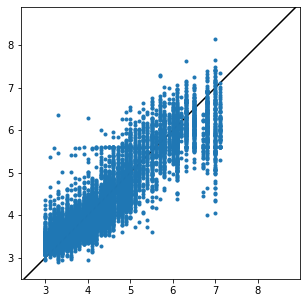

In [11]:
#测试结果
plt.figure(figsize=(5, 5))
plt.axis('equal')

x3 = np.arange(2.5, 8.9, 0.01)
y3=x3
plt.plot(x3, y3, "black")

plt.plot(y_zhenli1,zhenli_prediction,'.')
plt.xlim(2.5, 8.9)
plt.ylim(2.5, 8.9)
plt.show()

# Test on the Chinese strong-ground motion data

In [12]:
#中国地区应用
test_data_CH = pd.read_csv(open(r'\SVM-Mag test in China.csv',encoding='UTF-8'))
X_test_CH = test_data_CH.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12]].values
y_zhenli1_CH = test_data_CH.iloc[:, 13].values    #导入数据  iloc通过行号获取行数据

In [13]:
zhenli_prediction_CH=model_svr.predict(X_test_CH)

In [14]:
from sklearn import metrics
from sklearn.metrics import r2_score
#print(len(y_zhenli1_CH-zhenli_prediction_CH))

print("测试标准差STD=",np.std(zhenli_prediction_CH-y_zhenli1_CH))
print("测试误差均值MEAN=",np.mean(zhenli_prediction_CH-y_zhenli1_CH))
print("测试平均绝对误差MAE=",metrics.mean_absolute_error(zhenli_prediction_CH, y_zhenli1_CH))
print("测试RMSE=",metrics.mean_squared_error(zhenli_prediction_CH, y_zhenli1_CH)**0.5)
print("测试MAPE=",np.mean(np.abs((y_zhenli1_CH - zhenli_prediction_CH) / y_zhenli1_CH)) * 100)
print("测试r2 score:", r2_score(y_zhenli1_CH.ravel(), zhenli_prediction_CH))

测试标准差STD= 0.604311964904095
测试误差均值MEAN= 0.45424712907036746
测试平均绝对误差MAE= 0.6102076724260408
测试RMSE= 0.7559982838571258
测试MAPE= 14.445923448370968
测试r2 score: 0.10744931485397313


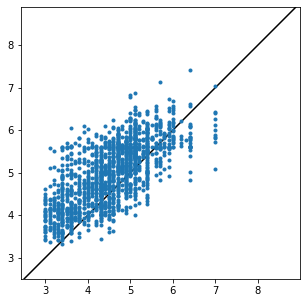

In [15]:
#测试结果
plt.figure(figsize=(5, 5))
plt.axis('equal')

x3 = np.arange(2.5, 8.9, 0.01)
y3=x3
plt.plot(x3, y3, "black")

plt.plot(y_zhenli1_CH,zhenli_prediction_CH,'.')
plt.xlim(2.5, 8.9)
plt.ylim(2.5, 8.9)
plt.show()